In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
import time

In [150]:
df=pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [151]:
df.shape

(39717, 111)

In [152]:
print(df.columns)

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       ...
       u'num_tl_90g_dpd_24m', u'num_tl_op_past_12m', u'pct_tl_nvr_dlq',
       u'percent_bc_gt_75', u'pub_rec_bankruptcies', u'tax_liens',
       u'tot_hi_cred_lim', u'total_bal_ex_mort', u'total_bc_limit',
       u'total_il_high_credit_limit'],
      dtype='object', length=111)


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


In [154]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [155]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [156]:
print(df.dtypes)

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [157]:

df['term']=df['term'].str.replace('months','')
df['int_rate']=df['int_rate'].str.replace('%','')
df['revol_util']=df['revol_util'].str.replace('%','')
df['emp_length']=df['emp_length'].str.replace('years','')
df['emp_length']=df['emp_length'].str.replace('year','')
df['emp_length']=df['emp_length'].str.replace('+','')
df['emp_length']=df['emp_length'].str.replace('<','')
df['emp_length']=df['emp_length'].str.replace('n/a','0')


In [158]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','int_rate','term']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [159]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


List of columns and NA counts where NA counts is greater than 30%

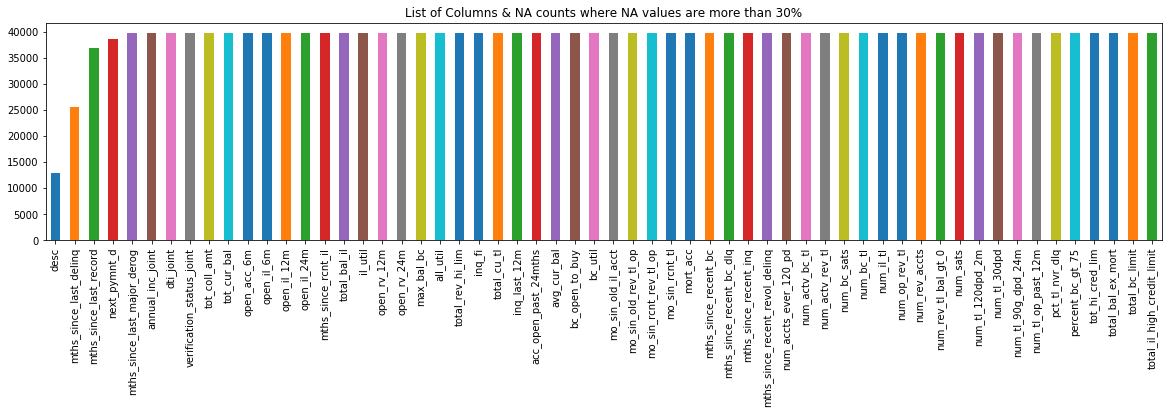

In [160]:
NA_col = df.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [161]:
 
colnames = (df.isnull().sum()/len(df))      
colnames = list(colnames[colnames.values>=.3].index)
    
df.drop(labels = colnames,axis =1,inplace=True) 
df.drop(["id","member_id","url","zip_code"],axis=1,inplace=True)
df.shape

(39717, 49)

In [162]:
 df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

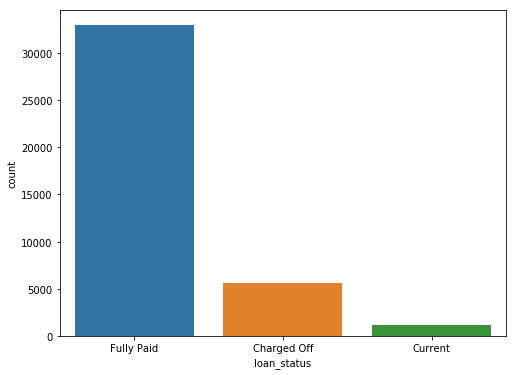

In [163]:
plt.figure(figsize=(8, 6))
sns.countplot(df["loan_status"])


# 2% of loans are charged off

# what we need to know:
    1.what amount was mostly issued to borrowers
    2.Which year issued the most loans.
answers
1. Mostly amount were in range 10000 to 20000 USD
2. Maximum number of loans are issued in year 2011
3. All three(Loan Applied by the Borrower,Amount Funded by the Lender,Total committed by Investors) have similar distributions    meaning that it is most likely that qualified borrowers are going to get the loan they had applied fo

Text(0.5,1,'Total committed by Investors')

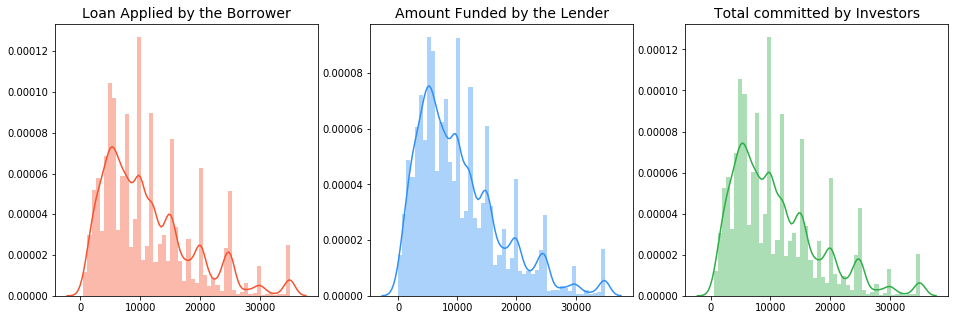

In [164]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amnt"].values
investor_funds = df["funded_amnt"].values
funded_amount = df["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

                       

In [165]:
df['issue_d'].value_counts()
df['issue_month'],df['issue_year'] = df['issue_d'].str.split('-', 1).str
df[['issue_d','issue_month','issue_year']].head()



,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


Text(0,0.5,'Average loan amount issued')

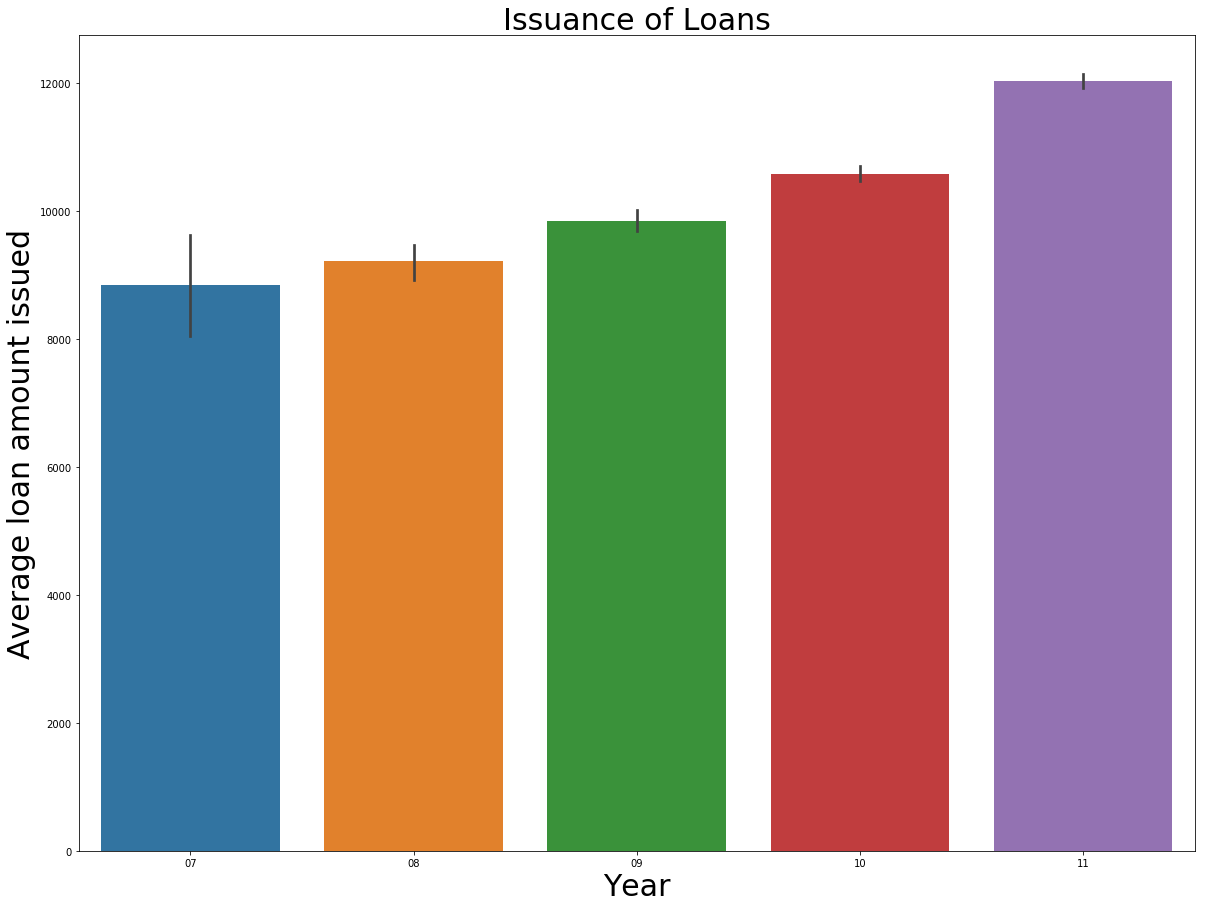

In [166]:
plt.figure(figsize=(20,15))
sns.barplot('issue_year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Average loan amount issued', fontsize=30)

In [167]:
 df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [168]:
bad_loan={"Charged Off"
}



def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)




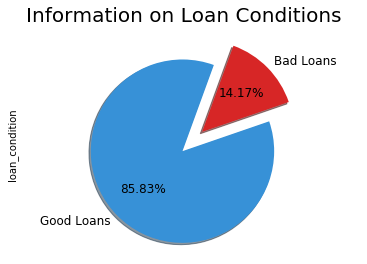

In [169]:


colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.30], autopct='%1.2f%%',  shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

plt.axis('equal')
plt.show()

  # Univariate Analysis
  
  1.Continuous Variables:
    In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured       using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.
  2.Categorical Variables:
   For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured        two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization

In [170]:
def univariate(df,col,vartype,hue=None):
     if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
 
     
    
        

# CONTINOUS VARIABLE
1.LOAN AMOUNT

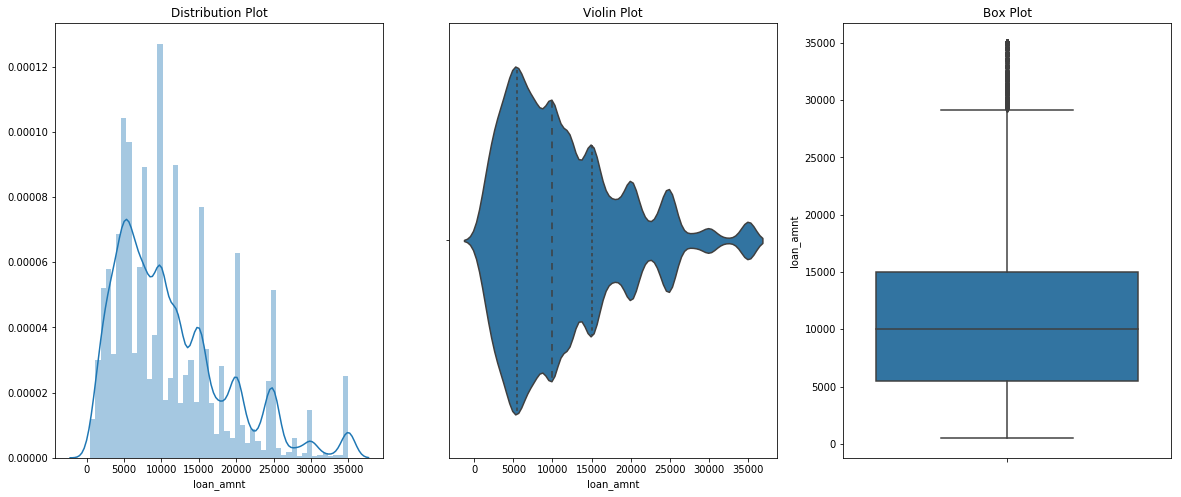

In [171]:
univariate(df,col='loan_amnt',vartype=0)

 Result--------MOST OF LOANS ARE DISTRIBUTED BETWEEN 10000 TO 20000 USD

2.ANNUAL INCOME

In [172]:
df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

HERE WE SEE THAT DIFFERENCE BETWEEN MAX VALUE AND MEAN VALUE IS VERY LARGE . THIS IS BECAUS EOF OUTLIERS ...SO WE WILL REMOVE OUTLIERS FROM THIS 

In [173]:
q = df["annual_inc"].quantile(0.995)
df = df[df["annual_inc"] < q]
df["annual_inc"].describe()

count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

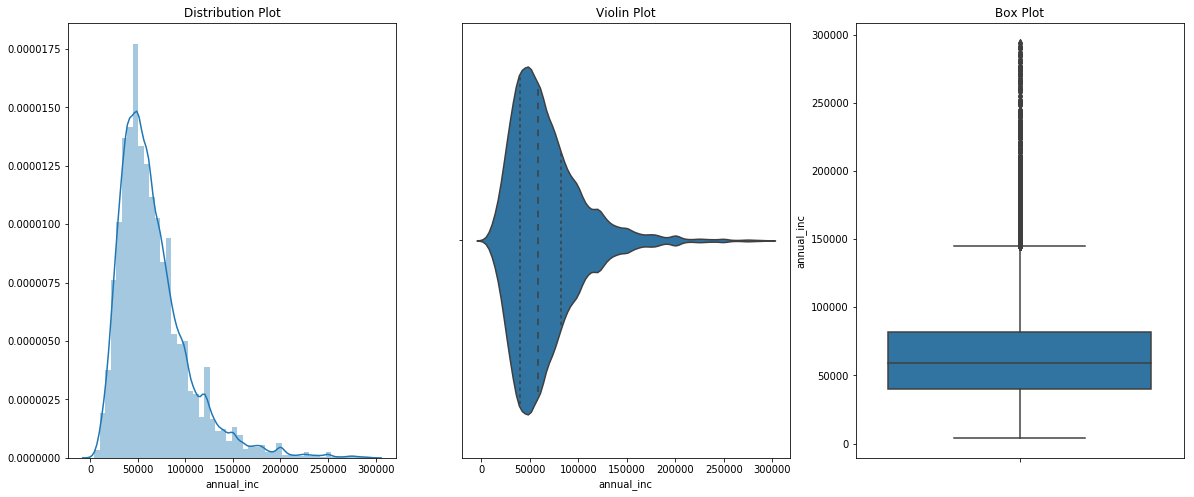

In [174]:
univariate(df,col='annual_inc',vartype=0)

RESULT.....MOST OF PERSON EARNS 40000 TO 100000 USD

3.DTI

In [177]:
df.dti.describe()

count    39494.000000
mean        13.356071
std          6.664136
min          0.000000
25%          8.230000
50%         13.450000
75%         18.620000
max         29.990000
Name: dti, dtype: float64

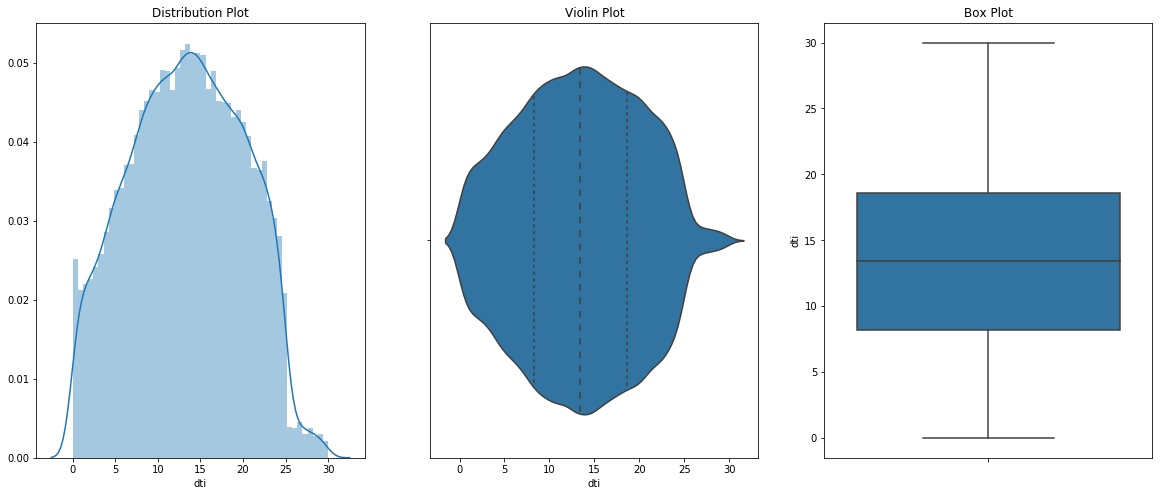

In [178]:
univariate(df,col='dti',vartype=0)

MOST OF DTI LIES BETWEEN 7 TO 17 ..

4.Insallments

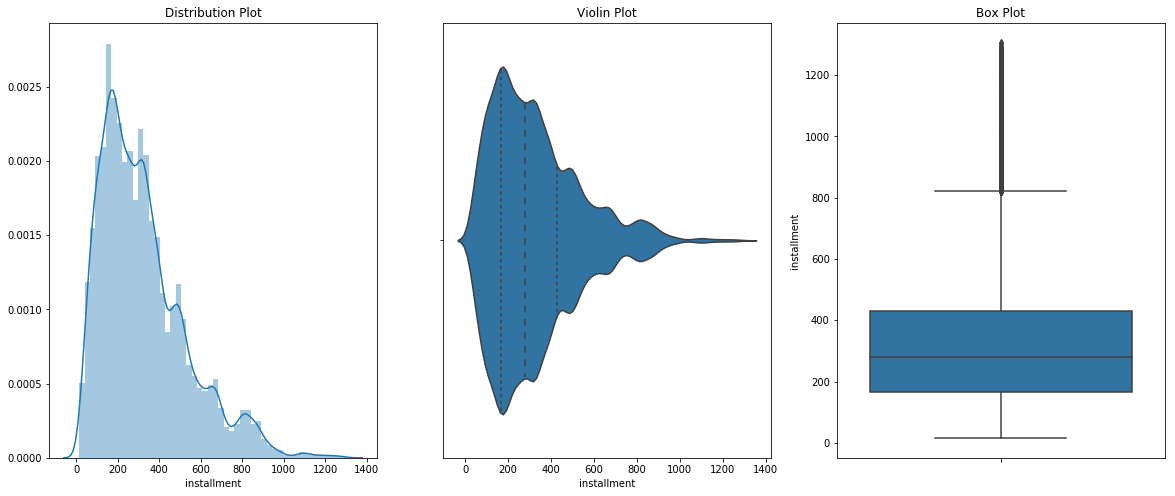

In [179]:
univariate(df,col='installment',vartype=0)

5.TERM

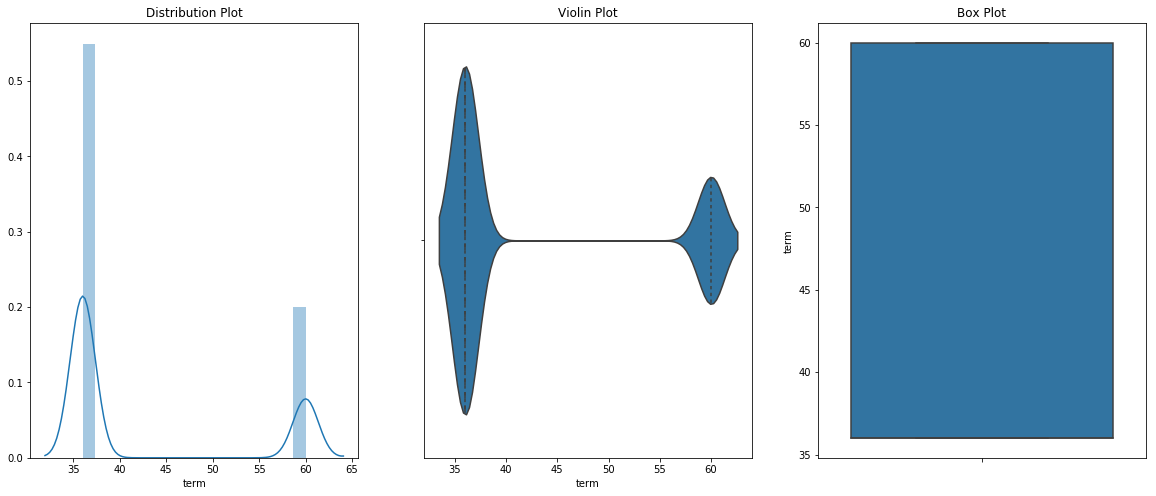

In [43]:
univariate(df,col='term',vartype=0)

# Bivariate analysis


1. Purpose of loan vs loan amount for each loan status

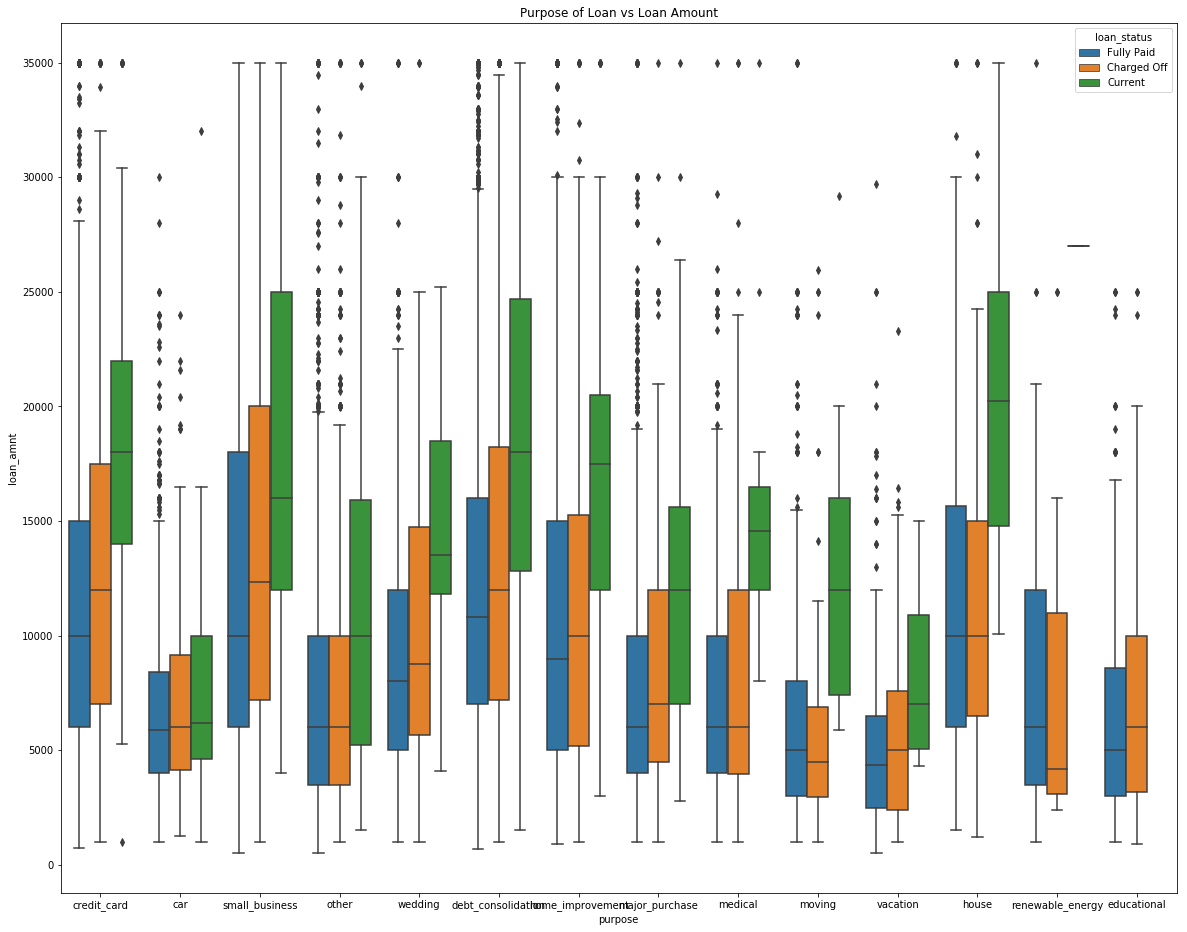

In [44]:
plt.figure(figsize=(20,16))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [182]:

loan_correlation = df.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.981632,0.940030,0.362497,0.307828,0.930014,0.417388,0.071792,-0.033878,0.007163,...,0.136617,0.073137,0.447957,NaN,NaN,NaN,NaN,NaN,-0.036185,NaN
funded_amnt,0.981632,1.000000,0.958361,0.341995,0.311449,0.955920,0.413076,0.071416,-0.034144,0.007557,...,0.137349,0.074874,0.452480,NaN,NaN,NaN,NaN,NaN,-0.037442,NaN
funded_amnt_inv,0.940030,0.958361,1.000000,0.362323,0.305506,0.904626,0.395652,0.079490,-0.040247,-0.007058,...,0.124686,0.060357,0.442693,NaN,NaN,NaN,NaN,NaN,-0.041779,NaN
term,0.362497,0.341995,0.362323,1.000000,0.451125,0.102855,0.076185,0.083362,0.006617,0.041251,...,0.102196,0.032536,0.232881,NaN,NaN,NaN,NaN,NaN,0.011595,NaN
int_rate,0.307828,0.311449,0.305506,0.451125,1.000000,0.281680,0.076645,0.113580,0.157059,0.133299,...,0.123365,0.067710,0.155496,NaN,NaN,NaN,NaN,NaN,0.083320,NaN
installment,0.930014,0.955920,0.904626,0.102855,0.281680,1.000000,0.416689,0.059603,-0.021865,0.007883,...,0.119037,0.075555,0.400789,NaN,NaN,NaN,NaN,NaN,-0.032853,NaN
annual_inc,0.417388,0.413076,0.395652,0.076185,0.076645,0.416689,1.000000,-0.118025,0.029974,0.036472,...,0.037754,0.023405,0.217374,NaN,NaN,NaN,NaN,NaN,-0.021679,NaN
dti,0.071792,0.071416,0.079490,0.083362,0.113580,0.059603,-0.118025,1.000000,-0.033394,0.003785,...,0.025379,0.012177,0.008067,NaN,NaN,NaN,NaN,NaN,0.005351,NaN
delinq_2yrs,-0.033878,-0.034144,-0.040247,0.006617,0.157059,-0.021865,0.029974,-0.033394,1.000000,0.007539,...,0.011883,0.012948,-0.014294,NaN,NaN,NaN,NaN,NaN,0.003830,NaN
inq_last_6mths,0.007163,0.007557,-0.007058,0.041251,0.133299,0.007883,0.036472,0.003785,0.007539,1.000000,...,0.019471,0.012747,0.027004,NaN,NaN,NaN,NaN,NaN,0.016694,NaN


It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.So we can take any one column out of them for our analysis.

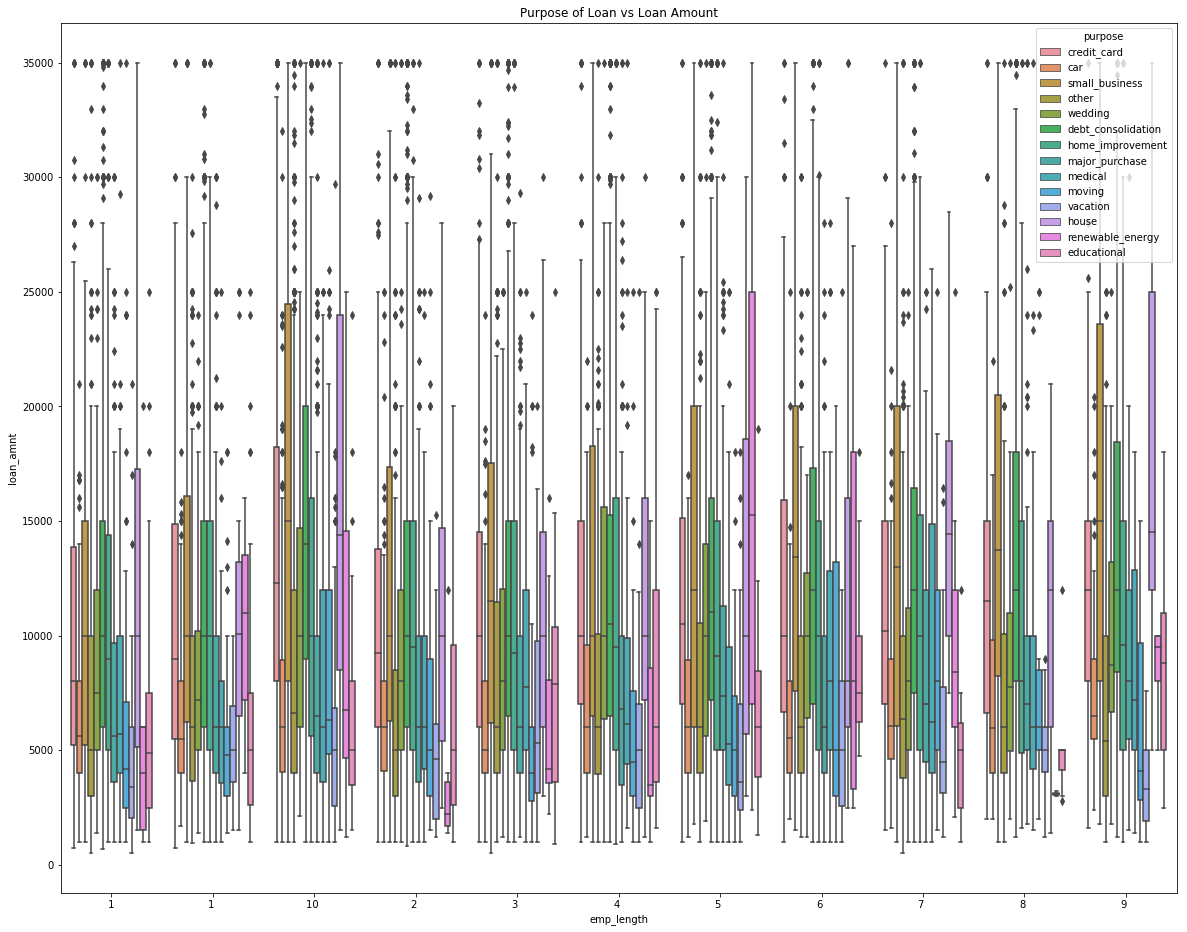

In [46]:
plt.figure(figsize=(20,16))
sns.boxplot(data =df, x='emp_length', y='loan_amnt', hue ='purpose')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

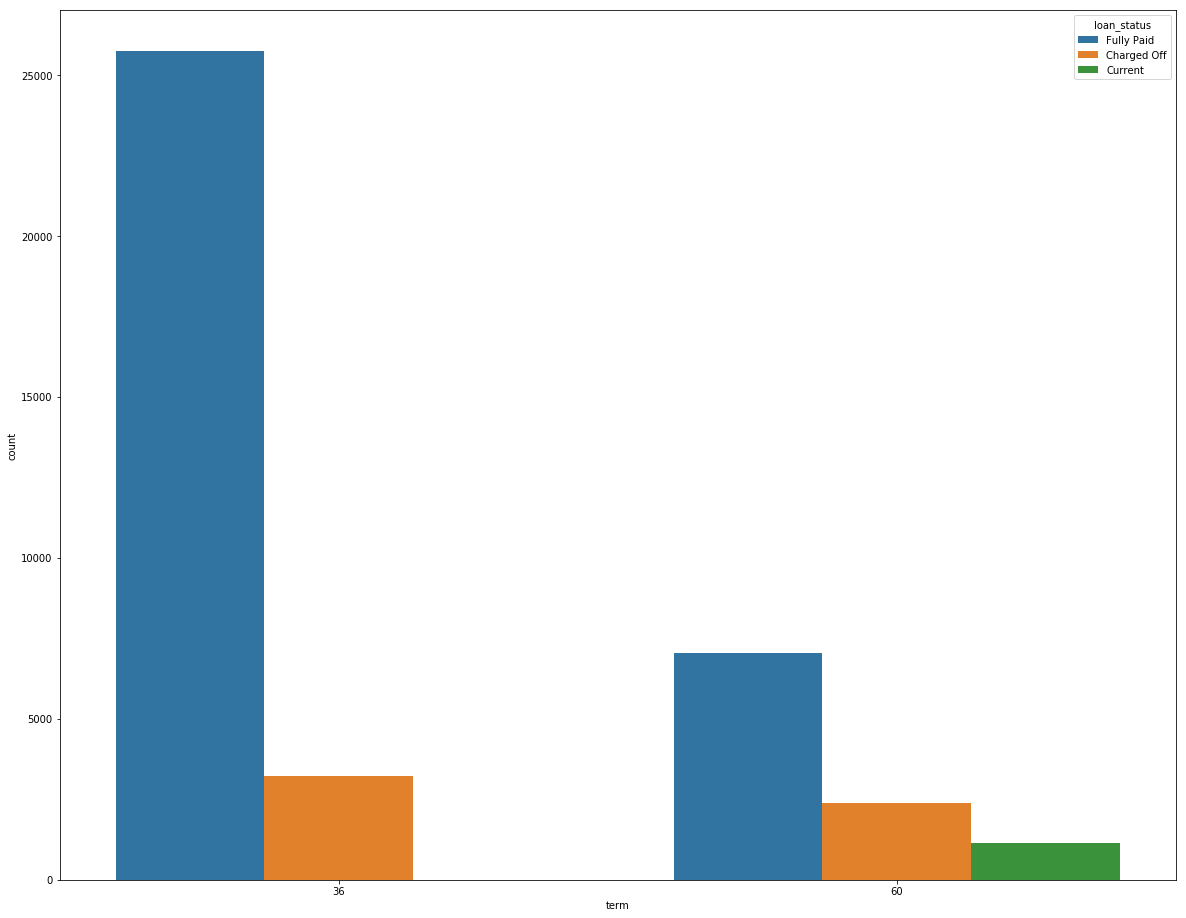

In [47]:
plt.figure(figsize=(20,16))
sns.countplot(data =df, x='term', hue ='loan_status')

plt.show()

 Here we see that for term of 36 months many loans are fully paid and around 3000 loans are charged off


 AND for 60 months term around 7000 loans are fully paid ,around 2000 is charged off and around 900 are current .So in this we would assure current loan should not be charged off

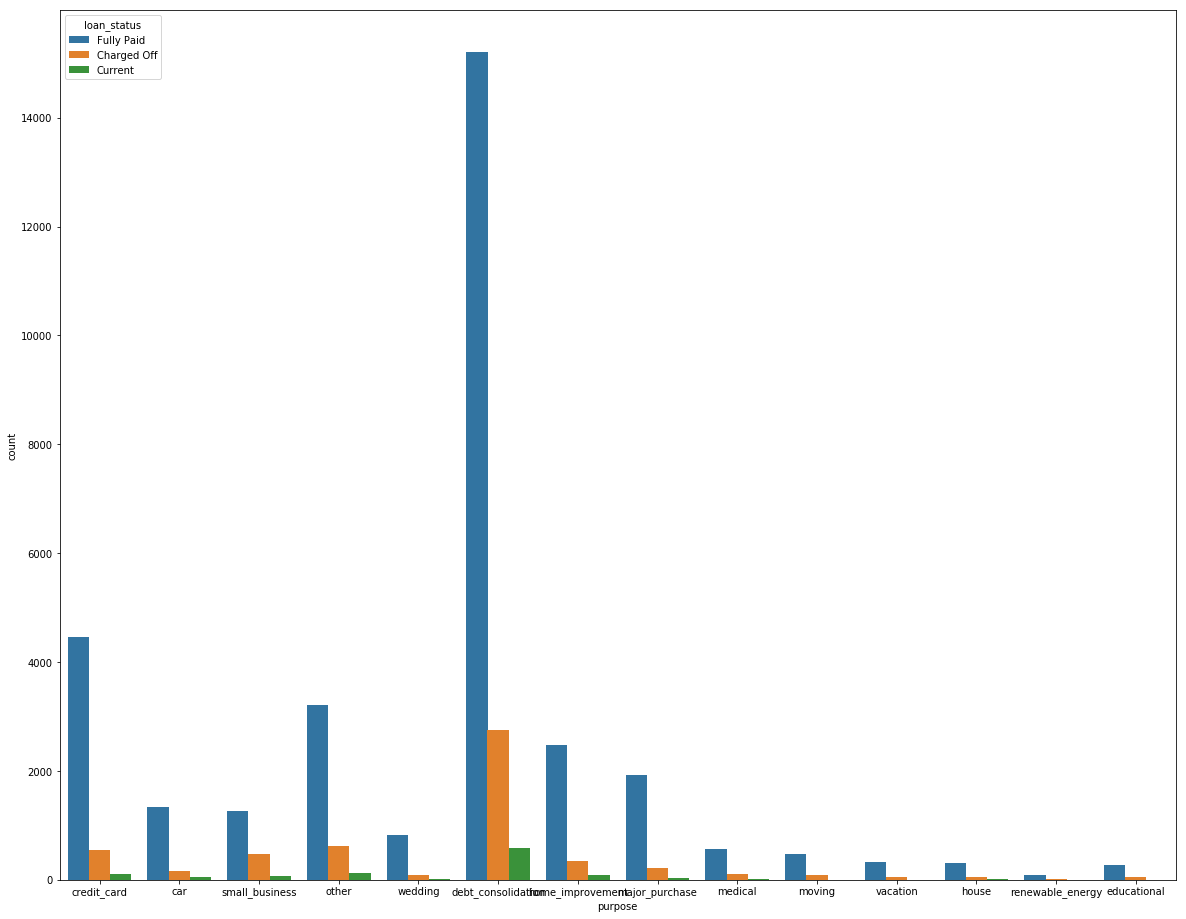

In [48]:
plt.figure(figsize=(20,16))
sns.countplot(data =df, x='purpose', hue ='loan_status')

plt.show()

More of the applicants applied loan for paying their other loans(Debt Consolidation).

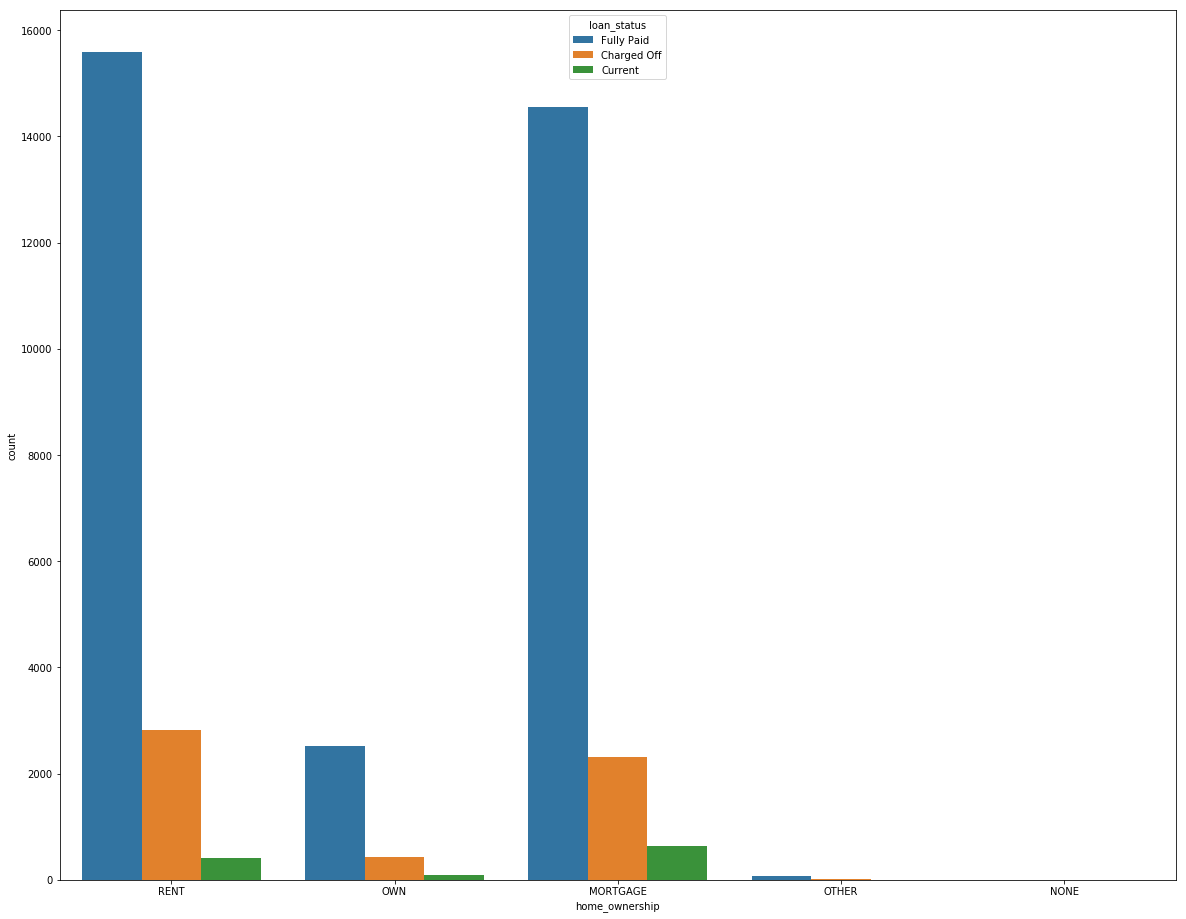

In [49]:
plt.figure(figsize=(20,16))
sns.countplot(data =df, x='home_ownership', hue ='loan_status')

plt.show()

Most of applicants are living in rented home and mortagaged their home from countlplot we can see this.

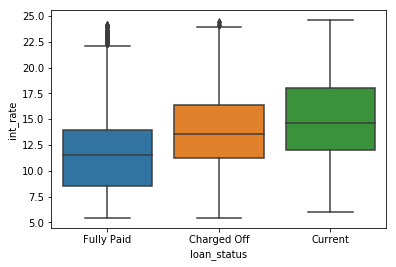

In [50]:
import seaborn as sns
sns.boxplot(x='loan_status',y='int_rate', data=df)
plt.show()

It is obvious that defaulters have high interest rate

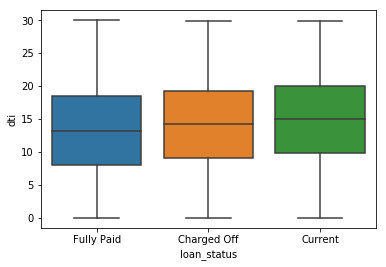

In [183]:
import seaborn as sns
sns.boxplot(x='loan_status',y='dti', data=df)
plt.show()

Defaulters havds slightly high DTI

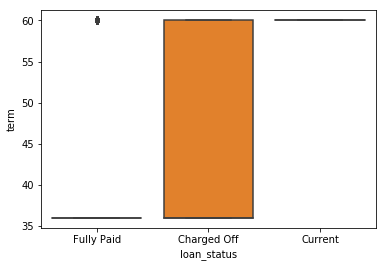

In [57]:
sns.boxplot(x='loan_status',y='term', data=df)
plt.show()

In [111]:
x=pd.crosstab(df.loan_status, df.int_rate, normalize=True)
x

int_rate,5.42,5.79,5.99,6.0,6.03,6.17,6.39,6.54,6.62,6.76,...,22.85,22.94,23.13,23.22,23.52,23.59,23.91,24.11,24.4,24.59
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,0.000506,0.000405,0.000481,0.000000,0.000127,0.000253,0.000025,0.000684,0.000734,0.000127,...,0.000101,0.000025,0.000127,0.000025,0.000101,0.000025,0.000025,0.000025,0.000025,0.000000
Current,0.000000,0.000000,0.000000,0.000051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000025,0.000025,0.000000,0.000076,0.000000,0.000051,0.000000,0.000000,0.000025
Fully Paid,0.013977,0.009976,0.008280,0.000405,0.011166,0.006102,0.001443,0.007014,0.009242,0.004127,...,0.000101,0.000000,0.000076,0.000203,0.000051,0.000076,0.000177,0.000051,0.000000,0.000000


In [112]:
x = pd.crosstab(index=df["grade"], 
                          columns=df["loan_status"],normalize='index')
x

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,0.059895,0.003980,0.936126
B,0.118493,0.028829,0.852678
C,0.166770,0.032559,0.800671
D,0.211524,0.041698,0.746778
E,0.252849,0.063390,0.683761
F,0.304432,0.070328,0.625241
G,0.322476,0.055375,0.622150


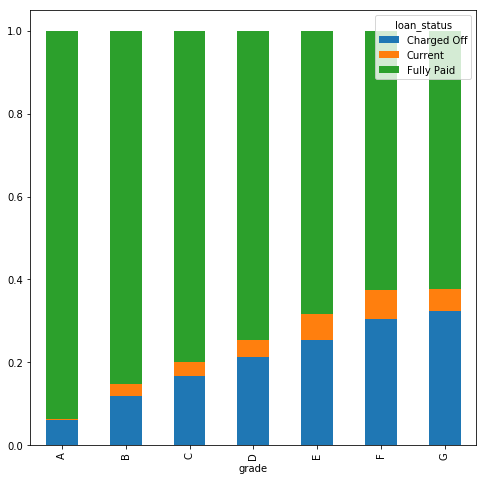

In [113]:
x.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

AS GRADE INCREASES NUMBER OF DEFAULTERS INCREASES

In [123]:
x = pd.crosstab(index=df["home_ownership"], 
                          columns=df["loan_status"],normalize='index')
x

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,0.132183,0.036216,0.831601
NONE,0.000000,0.000000,1.000000
OTHER,0.185567,0.000000,0.814433
OWN,0.144737,0.027303,0.827961
RENT,0.150202,0.022177,0.827621


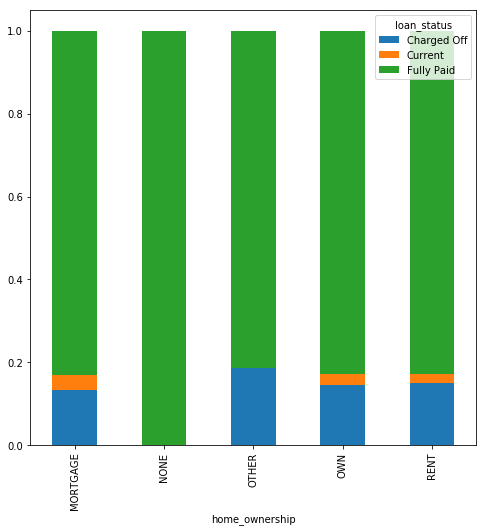

In [124]:
x.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [125]:
x = pd.crosstab(index=df["term"], 
                          columns=df["loan_status"],normalize='index')
x

loan_status,Charged Off,Current,Fully Paid
term,,,
36,0.111023,0.000000,0.888977
60,0.226454,0.107542,0.666003


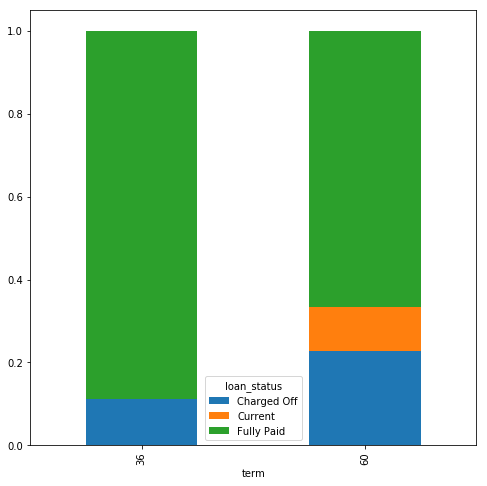

In [126]:
x.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [118]:
x = pd.crosstab(index=df["verification_status"], 
                          columns=df["loan_status"],normalize='index')
x

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,0.126631,0.013464,0.859905
Source Verified,0.143837,0.031168,0.824995
Verified,0.160535,0.047091,0.792374


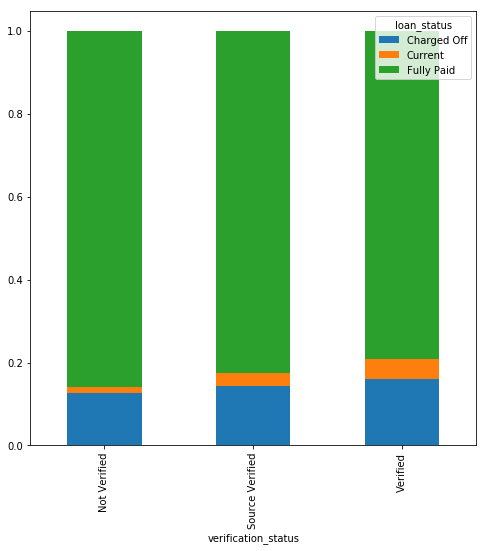

In [119]:
x.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [120]:
x = pd.crosstab(index=df["purpose"], 
                          columns=df["loan_status"], normalize='index') 
x

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,0.103426,0.032321,0.864253
credit_card,0.105871,0.020157,0.873973
debt_consolidation,0.148707,0.031519,0.819774
educational,0.172840,0.000000,0.827160
home_improvement,0.116661,0.033869,0.849470
house,0.157333,0.037333,0.805333
major_purchase,0.101103,0.017004,0.881893
medical,0.153846,0.017417,0.828737
moving,0.157439,0.012111,0.830450


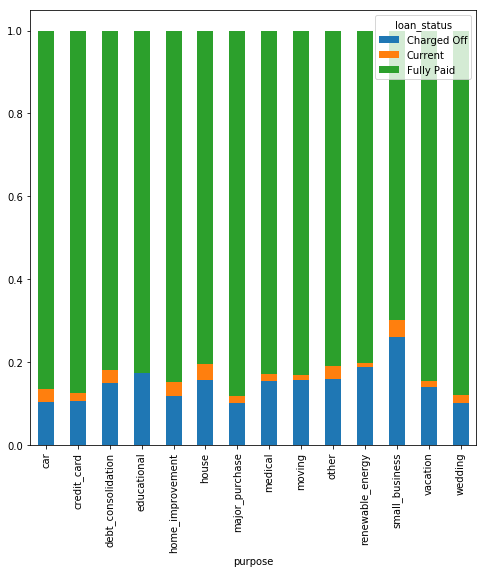

In [121]:
x.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [127]:
df.columns

Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'term', u'int_rate',
       u'installment', u'grade', u'sub_grade', u'emp_title', u'emp_length',
       u'home_ownership', u'annual_inc', u'verification_status', u'issue_d',
       u'loan_status', u'pymnt_plan', u'purpose', u'title', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths',
       u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'last_credit_pull_d',
       u'collections_12_mths_ex_med', u'policy_code', u'application_type',
       u'acc_now_delinq', u'chargeoff_within_12_mths', u'delinq_amnt',
       u'pub_rec_bankruptcies', u'tax_liens', u'issue_month', u'issue_year',
       u'loan_condition'],
      dtype='

# The important features are given below
   
loan_amnt                
term                   
int_rate               
grade                   
emp_length             
verification_status   
loan_status             
purpose                 
dti                    
inq_last_6mths           
open_acc                 
revol_bal                
revol_util             


# From above analysis through different types of graphs we can observe things easily